In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import sys
from tqdm import tqdm

import matplotlib

from funcs import plotting as plot

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [8]:
metrics_df = pd.read_csv("data/clustering/cluster_algorithm_comparison.tsv", sep="\t", index_col=0)

In [9]:
metrics_df["method"] = [x.split("_")[0] for x in metrics_df.index]
metrics_df["method"] = metrics_df["method"].apply(lambda x: "ccp" if x=="fna3" else x)

metrics_df["k"] = [x.split("_")[1][0] for x in metrics_df.index]
metrics_df["k"] = metrics_df["k"].apply(lambda x: 3 if x=="c" else x)
metrics_df['k'] = metrics_df['k'].astype(int)
metrics_df["sampling"] = metrics_df["run"].apply(lambda x: x.split("_")[0])

In [10]:
plt.style.use('ggplot')

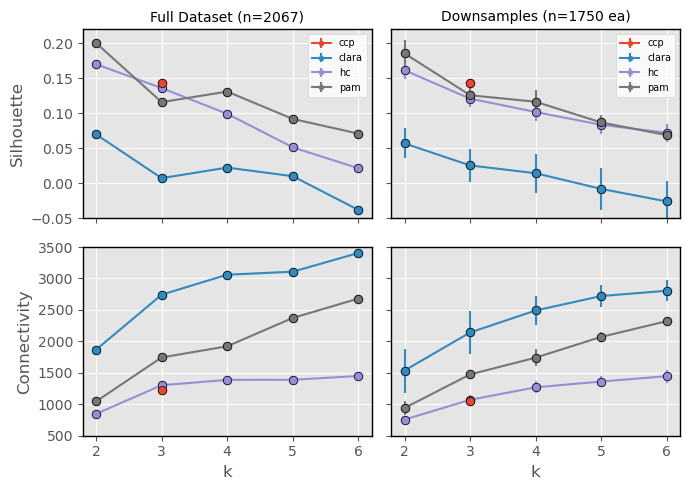

In [58]:
fig,axes = plt.subplots(2, 2, figsize=(7,5), sharex=True)

plot.plot_clust_metrics(metrics_df[metrics_df['run']=="full"], ax=axes[0,0])
plot.plot_clust_metrics(metrics_df[metrics_df['run']=="full"], y="Connectivity",ax=axes[1,0])
axes[1,0].get_legend().remove()
axes[0,0].set_xlabel("")
axes[1,0].set_xticks([2,3,4,5,6])
axes[1,0].set_xticklabels([2,3,4,5,6])

plot.plot_clust_metrics(metrics_df[metrics_df['run']!="full"], ax=axes[0,1])
plot.plot_clust_metrics(metrics_df[metrics_df['run']!="full"], y="Connectivity",ax=axes[1,1])

axes[1,1].get_legend().remove()
axes[0,1].set_xlabel("")
axes[1,1].set_xticks([2,3,4,5,6])
axes[1,1].set_xticklabels([2,3,4,5,6])

axes[0,0].set_ylim(-0.05,.22)
axes[0,1].set_ylim(-0.05,.22)

axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")

axes[0,1].set_yticklabels([])
axes[1,1].set_yticklabels([])

axes[1,0].set_ylim(500,3500)
axes[1,1].set_ylim(500,3500)

axes[0,0].set_title("Full Dataset (n=2067)", fontsize=10)
axes[0,1].set_title("Downsamples (n=1750 ea)", fontsize=10)

plt.tight_layout()
plt.savefig("figures/clustering_algo_comparison.pdf", dpi=200, bbox_inches="tight")
